# Unsupervised Learning

In the class we learned two commonly used unsupervised learning algorithms:
* Principal Component Analysis
* K-Means

In this exercise we will use the two to perform clustering for Iris Data set.

## Iris Dataset

[Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is a very popular dataset in machine learning community. Developed by Fisher, it containd 3 classes each with 50 instances. Each of the three class refers to a type of Iris plant. Each data point consists of four different attributes and a class label:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
 * Iris Setosa
 * Iris Versicolour
 * Iris Virginica




In [1]:
#@title Import Necessary Modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Exercise 1: Download Data

Download the data using `tf.keras.utils.get_file()` function. Pass two arguments to the function the file name and the url containg the data.

* For training data use the file name (`fname`) "iris_training.csv" and the url is "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

* For test data use the file name (`fname`) "iris_test.csv" and the url is "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

For more information and usage you can refer to [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file).



In [3]:
# To Do Complete the code
## Replace the ... with right code
train_path = tf.keras.utils.get_file('iris_training.csv','https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv')
test_path = tf.keras.utils.get_file('iris_test.csv','https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv')

# ----------------- Do not change anything below ------------------------------------#
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

573/573 [==============================] - 0s 0us/step


### Exercise 2: Data Analysis and Visualization

Analyze the data. Analyzing data is avery important skill. You can start from simple information like size of test and train dataset. To random sample of few to plotting between different features. [Here](https://www.kaggle.com/kstaud85/iris-data-visualization) is an example dataset visualization notebook for Iris Dataset. You can take some ideas from here.

As part of the exercise we expect you to perform atleast three analysis/visualizations.
You can use as many code cells as you need.

Remember `train` and `test` are Pandas DataFrames.

600
150


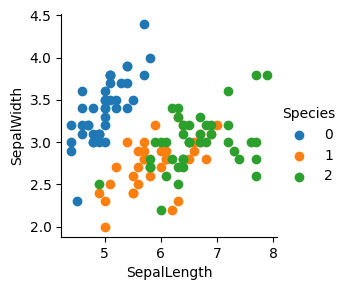

In [20]:
## To do write code to analyze and visualize the data
#  you can add as many code cells as you requre
# below for example we show the top 5 samples from training dataset.

import seaborn as sns

#Sizes of train and test data
print(train.size)
print(test.size)
#train.head(5)

# Samples from each species
train["Species"].value_counts()

sns.FacetGrid(train, hue="Species").map(plt.scatter, "SepalLength", "SepalWidth").add_legend()
plt.show()


### Exercise 3 : Preprocess the data

Implement the following steps:

1. Drop the label - Species, since we are doing Unsupervised learning we do not need labels.

 ###### You may want to save labels separately too verify if indeed your model has been able to cluster properly.

2. For PCA it is good if the data has zero mean and variance of 1. To achieve this subtract mean and  divide by standard deviation.


In [33]:
## Drop the labels

train_df=train.drop(columns=['Species'])
test_df=test.drop(columns=['Species'])
train_df.head(5)


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [35]:
# Subtract mean from individual value and divide by standard deviation

normalized_train=...
normalized_test=...

normalized_train = (train_df - train_df.mean()) / train_df.std()
normalized_test= (test_df - test_df.mean()) / test_df.std()

# Print the normalized DataFrame
print(normalized_train.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth
0     0.638975   -0.620382     1.021257    1.282971
1    -0.972854   -1.790915    -0.241022   -0.251479
2    -1.087985   -1.322702     0.417558    0.643616
3    -1.087985    0.081937    -1.228893   -1.402317
4    -0.166939    1.720683    -1.119130   -1.146575


### Exercise 4:
Compute the SUV matrices using TensorFlow `linalg()` function. Once you get SUV matrices convert S matrix to diagonal matrix  using `tf.linalg.diag()`

In [36]:
# Compute the SUV matrces
s, u, v = tf.linalg.svd(normalized_train)

In [37]:
s = tf.linalg.diag(s)

# Print the diagonal matrix
print(s)

tf.Tensor(
[[18.53995265  0.          0.          0.        ]
 [ 0.         10.62388246  0.          0.        ]
 [ 0.          0.          4.11726273  0.        ]
 [ 0.          0.          0.          1.56570271]], shape=(4, 4), dtype=float64)


### Exercise 5:

Now compute the PCA for 2 principal components. See how the shape gets modified from original dataset and PCA dataset.

In [39]:
k = 2

# We will identify the 2 principal components based on eigen values
# Compute the covariance matrix
cov_matrix = tf.linalg.matmul(normalized_train, normalized_train, transpose_a=True) / normalized_train.shape[0]

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = tf.linalg.eigh(cov_matrix)

# Get the indices of the top k eigenvalues
top_indices = tf.argsort(eigenvalues, direction='DESCENDING')[:k]

# Select the top k eigenvectors
top_eigenvectors = tf.gather(eigenvectors, top_indices, axis=1)

# Transform the data to the reduced dimensions
pca = tf.matmul(normalized_train, top_eigenvectors)


In [40]:
print('original data shape',train.shape)
print('reduced data shape', pca.shape)

original data shape (120, 5)
reduced data shape (120, 2)


### Exercise 6:
Let us plot and see if our PCA is able to cluster the dataset.

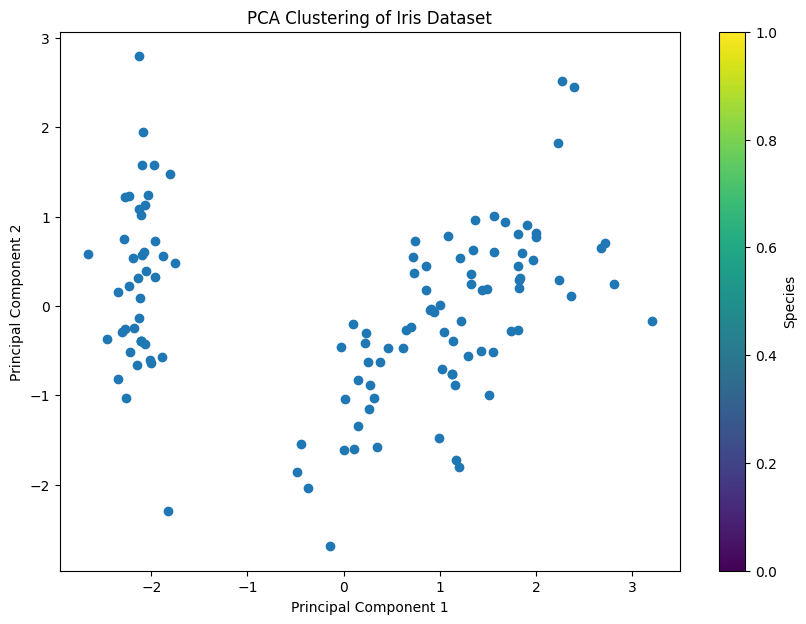

In [44]:

# Convert PCA result to a numpy array
pca_array = pca.numpy()

# Scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_array[:, 0], pca_array[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clustering of Iris Dataset')
plt.colorbar(label='Species')
plt.show()

## Optional Exercise

Repeating the clustering process this time using the K-means algorithm on the Iris dataset. Reflect on the result.